# Top URLs shared (Sampled Streaming Data)

In [1]:
import psycopg2
import pandas as pd
import config
from matplotlib import pylab as plt
import seaborn as sns
import numpy as np

color_palette = sns.color_palette(palette='muted', n_colors=None, desat=.75)
sns.set(context='notebook', palette=color_palette, style='whitegrid', font='sans-serif', font_scale=1.5, color_codes=False, rc=None)

%matplotlib inline

directory = "url_top_lists/"
stream = "sampled"

In [2]:
conn = None
try:
    # read connection parameters
    params = config.cfgAzureS17()
    
    paramsS03 = config.cfgAzureS03()

    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    connS17 = psycopg2.connect(**params)
    
    connS03 = psycopg2.connect(**paramsS03)

    # create a cursor
    curS17 = connS17.cursor()
    curS03 = connS03.cursor()

    # execute a statement
    print('PostgreSQL database version:')
    curS17.execute('SELECT version()')
    curS03.execute('SELECT version()')
    # display the PostgreSQL database server version
    db_version_curS17 = curS17.fetchone()
    db_version_curS03 = curS03.fetchone()
    print(db_version_curS17)
    print(db_version_curS03)

    # close the communication with the PostgreSQL
    curS17.close()
    curS03.close()

except (Exception, psycopg2.DatabaseError) as error:
    print(error)

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)


In [3]:
#tweets03 = pd.read_sql_query("SELECT * FROM tweets_info;", conn, parse_dates=['created_at'] )
#tweets03['created_at'] = tweets['created_at'].dt.tz_localize("UTC").dt.tz_convert("Europe/Berlin")
tweets03 = pd.read_sql_query("SELECT * FROM tweets_urls;", connS03 )

print("Number of Tweets: %s" %len(tweets03))
tweets03.head()

Number of Tweets: 40339


,tweet_id,short_url,resolved_url,response_code,domain,top_level_domain,is_twitter_url,is_media,is_processed,failed
0,953585808631631872,https://twitter.com/Zockerli/status/9533707770...,https://twitter.com/Zockerli/status/9533707770...,200.0,https://twitter.com/,twitter.com,True,False,True,False
1,952676758066728960,http://bit.ly/2D8B0mK,http://dalyaakota.ru/mghnfgnrtgfgnfgbfbrgdfnfg...,NaN,http://dalyaakota.ru/,dalyaakota.ru,False,None,True,True
2,952676816820621314,http://youtu.be/xo1eqTeG5DY?a,https://www.youtube.com/watch?v=xo1eqTeG5DY&fe...,200.0,https://www.youtube.com/,youtube.com,False,False,True,False
3,952676760390336512,http://on.wusa9.com/2D0gSit,https://www.wusa9.com/article/news/nation-worl...,200.0,https://www.wusa9.com/,wusa9.com,False,False,True,False
4,952677085230915589,https://www.refcrime.info/de/Crime/Show/74471?...,https://www.refcrime.info/de/Crime/Show/74471?...,200.0,https://www.refcrime.info/,refcrime.info,False,False,True,False


In [3]:
#tweets03 = pd.read_sql_query("SELECT * FROM tweets_info;", conn, parse_dates=['created_at'] )
#tweets03['created_at'] = tweets['created_at'].dt.tz_localize("UTC").dt.tz_convert("Europe/Berlin")
tweets17 = pd.read_sql_query("SELECT * FROM tweets_urls;", connS17 )

print("Number of Tweets: %s" %len(tweets17))
tweets17.head()

Number of Tweets: 35687


,tweet_id,short_url,resolved_url,response_code,domain,top_level_domain,is_twitter_url,is_media,is_processed,failed
0,989097603664138240,http://arte.tv/abgedreht,https://www.arte.tv/de/videos/RC-014033/abgedr...,200.0,https://www.arte.tv/,arte.tv,False,False,True,False
1,988175933659021318,https://twitter.com/piersmorgan/status/9873882...,https://twitter.com/piersmorgan/status/9873882...,200.0,https://twitter.com/,twitter.com,True,False,True,False
2,988176164358361088,https://www.journal.koeln/pol-ham-fahrradfahre...,https://www.journal.koeln/pol-ham-fahrradfahre...,200.0,https://www.journal.koeln/,journal.koeln,False,False,True,False
3,988176403412766720,http://www.radionomy.com/erika1,https://www.radionomy.com/en/radio/erika1,200.0,https://www.radionomy.com/,radionomy.com,False,False,True,False
4,988176415995592704,https://twitter.com/JanLatten/status/988161845...,https://twitter.com/JanLatten/status/988161845...,200.0,https://twitter.com/,twitter.com,True,False,True,False


https://twitter.com/account/suspended                                                                                                                                                       183
https://www.youtube.com/watch?v=Dw-2hh6G_D8&feature=youtu.be&a                                                                                                                               68
https://www.dwd.de/                                                                                                                                                                          52
http://www.deutschlandfunk.de/dlf24-startseite.1441.de.html                                                                                                                                  50
https://pi2.17bullets.com/tw_post.php?messageId=achievement&values=&locale=en_US                                                                                                             50
http://www.blackpinkyg.com/             

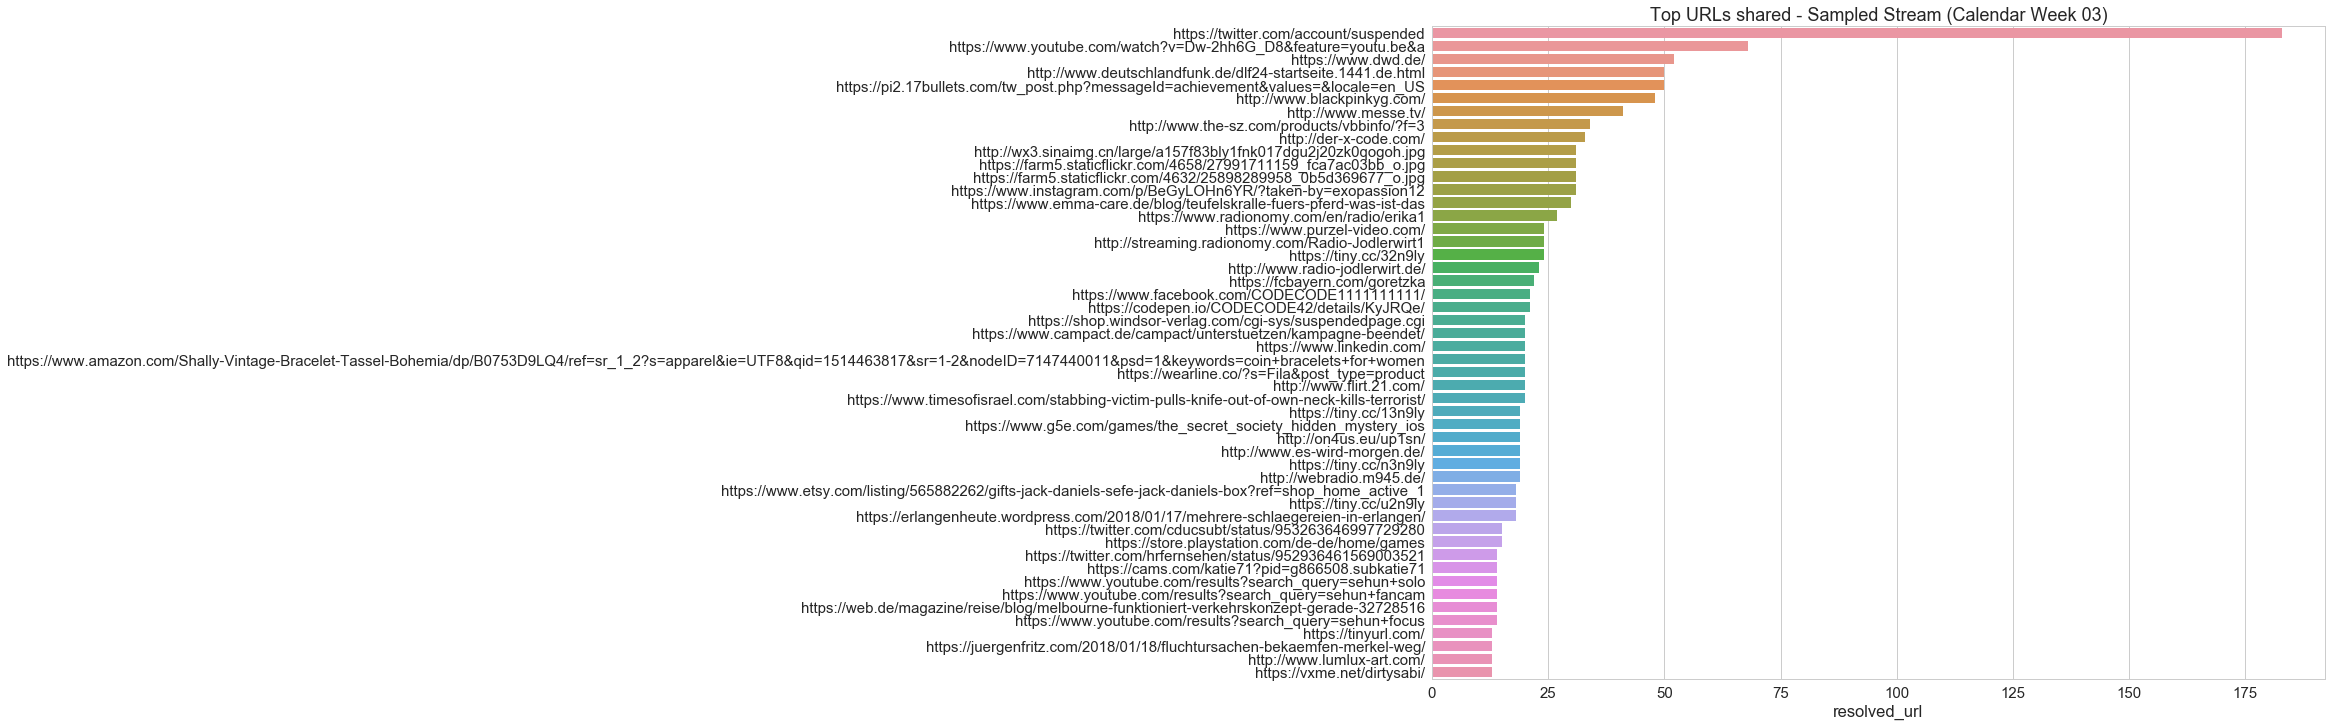

In [9]:
top_urls_03 = tweets03['resolved_url'].value_counts()

plt.figure(figsize=(16,12))

print(top_urls_03[:50])
ax = sns.barplot(y=top_urls_03[:50].index, x=top_urls_03[:50])
ax.set_title("Top URLs shared - Sampled Stream (Calendar Week 03)")

plt.savefig(directory + stream + "/sampled-top-urls-shared-03.png", transparent=True)

https://www.dwd.de/                                                                                                  60
https://www.ffd365.de                                                                                                57
https://pi2.17bullets.com/tw_post.php?messageId=achievement&values=&locale=en_US                                     56
http://susanne-ulrike-maria-albrecht.over-blog.de/                                                                   53
https://twitter.com/buzzfeedfrance/status/988362712513171456                                                         47
https://twitter.com/Markus_Soeder/status/988768341820170240                                                          43
https://www.youtube.com/watch?v=F-eMt3SrfFU&feature=youtu.be                                                         37
https://www.youtube.com/watch?v=tBWJ3bvJuT0&feature=youtu.be                                                         36
https://www.linkedin.com/               

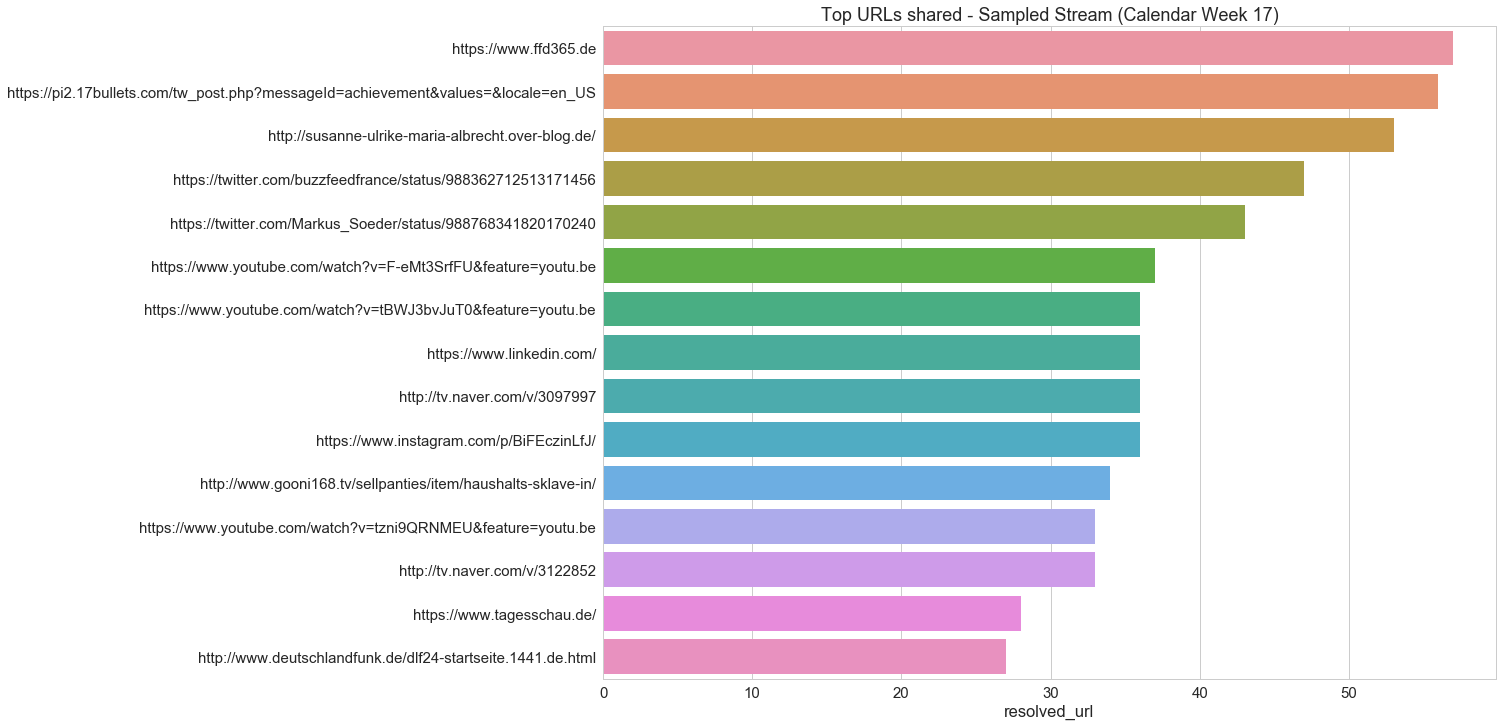

In [5]:
top_urls_17 = tweets17['resolved_url'].value_counts()

plt.figure(figsize=(16,12))

print(top_urls_17[:50])
ax = sns.barplot(y=top_urls_17[1:16].index, x=top_urls_17[1:16])
ax.set_title("Top URLs shared - Sampled Stream (Calendar Week 17)")

plt.savefig(directory + stream + "/sampled-top-urls-shared-17.png", transparent=True)

twitter.com                 6362
youtube.com                 3262
facebook.com                1000
instagram.com                727
welt.de                      688
spiegel.de                   470
focus.de                     377
amazon.de                    372
google.com                   338
bild.de                      336
twitch.tv                    311
faz.net                      289
wordpress.com                264
sueddeutsche.de              248
zeit.de                      229
presseportal.de              221
tagesschau.de                197
miet-check.de                190
benzinpreis-aktuell.de       187
pressebank.de                183
heise.de                     174
paper.li                     174
ask.fm                       171
tagesspiegel.de              162
n-tv.de                      147
epochtimes.de                133
derstandard.at               132
philosophia-perennis.com     128
handelsblatt.com             120
bestbet4u.com                116
persy.jobs

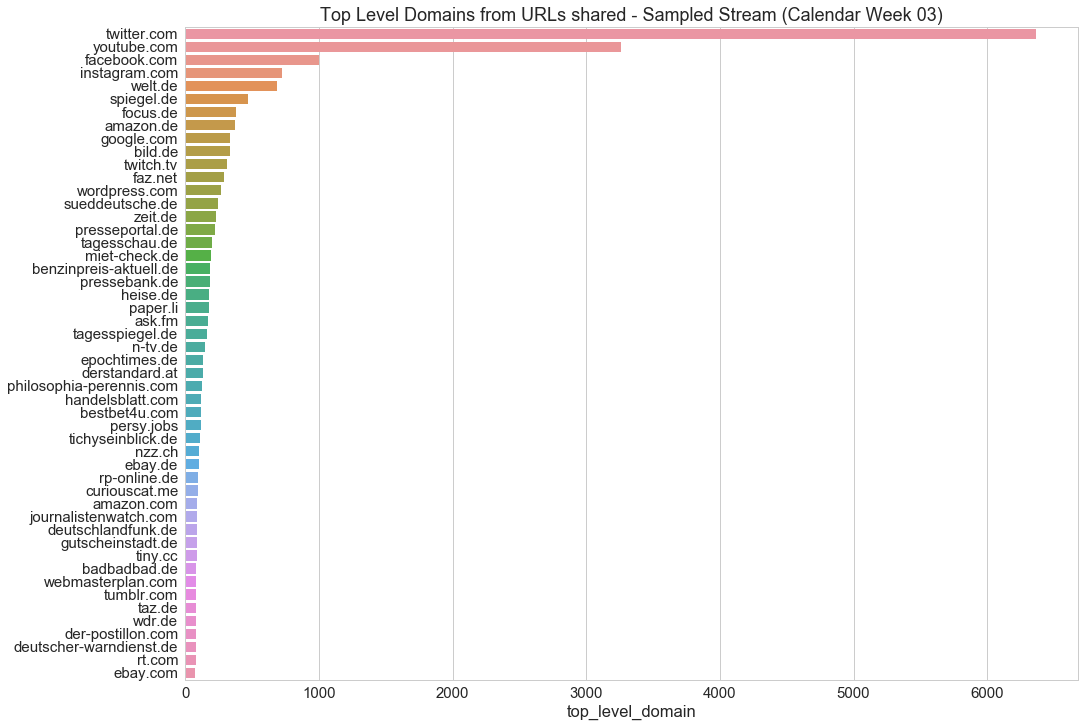

In [11]:
top_urls_03 = tweets03['top_level_domain'].value_counts()

plt.figure(figsize=(16,12))
print(top_urls_03[:50])
ax = sns.barplot(y=top_urls_03[:50].index, x=top_urls_03[:50])
ax.set_title("Top Level Domains from URLs shared - Sampled Stream (Calendar Week 03)")

plt.savefig(directory + stream + "/sampled-top-tld-shared-03.png", transparent=True)

twitter.com                 6192
youtube.com                 2961
facebook.com                 884
instagram.com                805
welt.de                      534
spiegel.de                   430
amazon.de                    334
twitch.tv                    318
focus.de                     291
wordpress.com                261
bild.de                      258
faz.net                      256
zeit.de                      219
sueddeutsche.de              216
google.com                   206
tagesschau.de                205
presseportal.de              181
paper.li                     178
tagesspiegel.de              173
heise.de                     141
n-tv.de                      138
epochtimes.de                127
favstar.fm                   126
journalistenwatch.com        111
sinaimg.cn                   106
handelsblatt.com             100
over-blog.de                  99
rt.com                        94
taz.de                        94
ebay.de                       91
tichyseinb

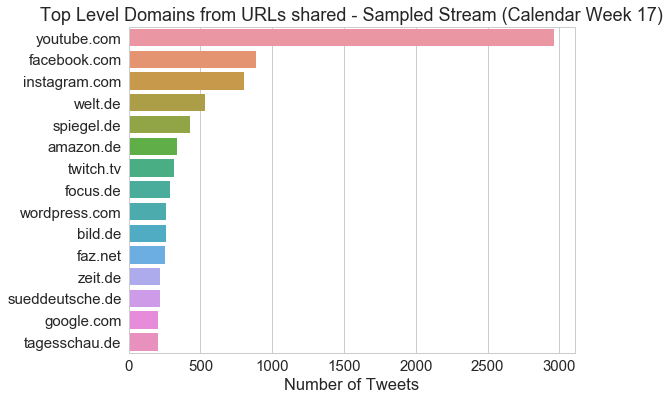

In [12]:
top_urls_17 = tweets17['top_level_domain'].value_counts()

plt.figure(figsize=(8,6))

print(top_urls_17[:50])
ax = sns.barplot(y=top_urls_17[1:16].index, x=top_urls_17[1:16])
ax.set_title("Top Level Domains from URLs shared - Sampled Stream (Calendar Week 17)")
ax.set_xlabel("Number of Tweets")

plt.savefig(directory + stream + "/sampled-top-tld-shared-17.png", transparent=True)

https://twitter.com/                   6352
https://www.youtube.com/               3247
https://www.facebook.com/               892
https://www.instagram.com/              708
https://www.welt.de/                    671
http://www.spiegel.de/                  447
https://www.amazon.de/                  370
https://www.focus.de/                   368
https://www.twitch.tv/                  286
https://www.bild.de/                    273
http://www.faz.net/                     260
http://www.sueddeutsche.de/             242
https://www.presseportal.de/            221
https://www.zeit.de/                    219
https://www.miet-check.de/              190
https://www.benzinpreis-aktuell.de/     187
https://www.pressebank.de/              183
http://www.tagesschau.de/               177
https://ask.fm/                         171
https://www.heise.de/                   167
https://paper.li/                       159
https://www.tagesspiegel.de/            144
https://www.n-tv.de/            

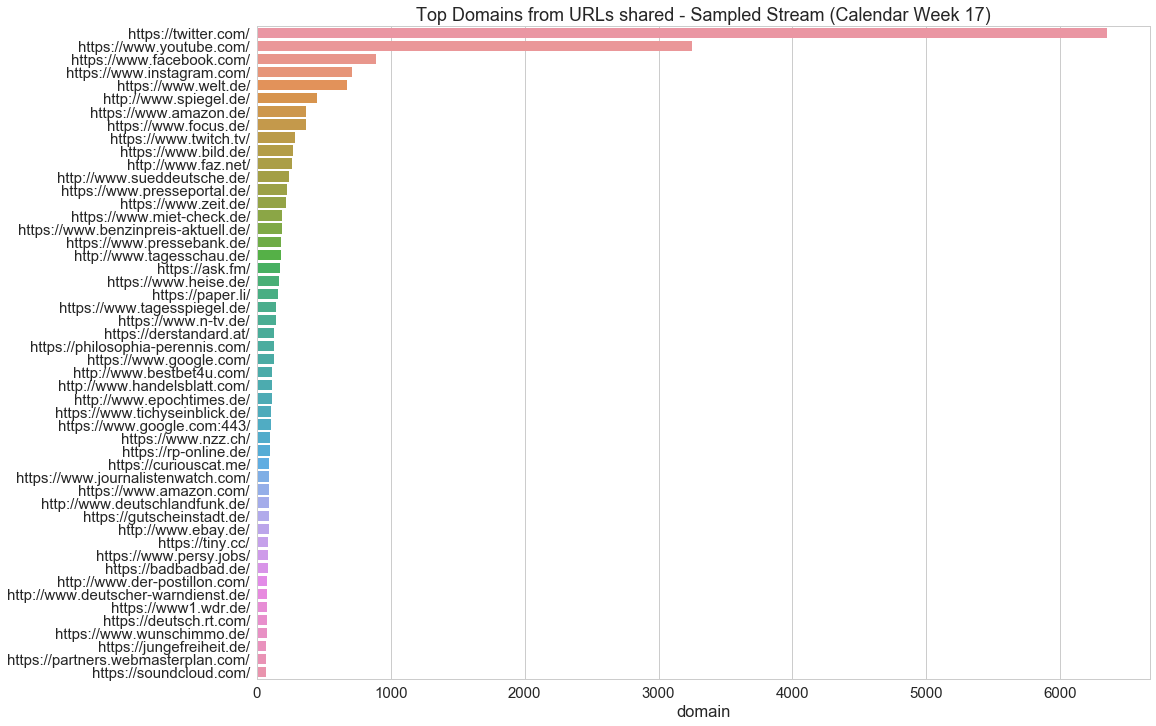

In [13]:
top_urls_03 = tweets03['domain'].value_counts()

plt.figure(figsize=(16,12))

print(top_urls_03[:50])
ax = sns.barplot(y=top_urls_03[:50].index, x=top_urls_03[:50])
ax.set_title("Top Domains from URLs shared - Sampled Stream (Calendar Week 17)")

plt.savefig(directory + stream + "/sampled-top-domains-shared-17.png", transparent=True)

https://twitter.com/                                  6180
https://www.youtube.com/                              2947
https://www.facebook.com/                              837
https://www.instagram.com/                             770
https://www.welt.de/                                   521
http://www.spiegel.de/                                 407
https://www.amazon.de/                                 332
https://www.twitch.tv/                                 306
https://www.focus.de/                                  279
http://www.faz.net/                                    234
https://www.bild.de/                                   210
https://www.zeit.de/                                   209
http://www.sueddeutsche.de/                            194
https://www.presseportal.de/                           181
https://paper.li/                                      169
http://www.tagesschau.de/                              150
https://www.tagesspiegel.de/                           1

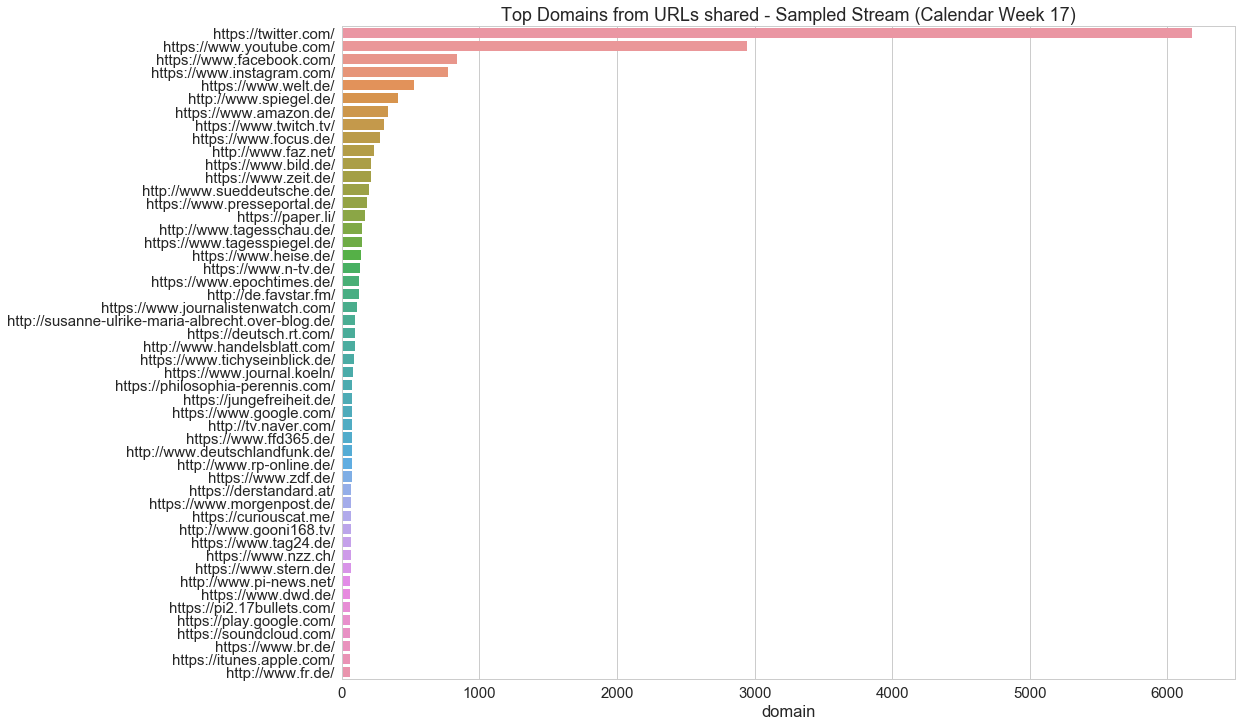

In [12]:
top_urls_17 = tweets17['domain'].value_counts()

plt.figure(figsize=(16,12))

print(top_urls_17[:50])
ax = sns.barplot(y=top_urls_17[:50].index, x=top_urls_17[:50])
ax.set_title("Top Domains from URLs shared - Sampled Stream (Calendar Week 17)")

plt.savefig(directory + stream + "/sampled-top-domains-shared-17.png", transparent=True)